In [1]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

<div class="alert alert-info">
<b>Case № 0</b>

Найти минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.

</div>

$$n = \bigg(\frac{Z\alpha * \sigma}{\Delta}\bigg)^2$$

In [2]:
variance = 225
confidence = .95
z = 1.96
delta = 3
n = int(((z * variance **.5) / delta) ** 2)
n

96

<div class="alert alert-info">
<b>Case № 1</b>

Построить `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
</div>

$$\bigg(\bar{X} + Z\alpha * \frac{\sigma}{{\sqrt{n}}}\bigg) - \bigg(\bar{X} - Z\alpha * \frac{\sigma}{{\sqrt{n}}}\bigg) $$

In [3]:
n = 25
x_mean = 130
sigma = 15
confidence = .98
se = sigma / (n ** .5)
z = stats.t.ppf((1 + confidence)/2, n)
L = int((x_mean + z * se)-(x_mean - z * se))
L

14

<div class="alert alert-info">
<b>Case № 2</b>

Даны две выборки роста мужчин и женщин. 
- Доказать, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Показать различия визуально
</div>

Гипотеза о равенстве роста мужчин и женщин
H0 - различий нет
H1 - различия есть
p-значение: 0.025%
Отклоняем нулевую гипотезу - различия есть


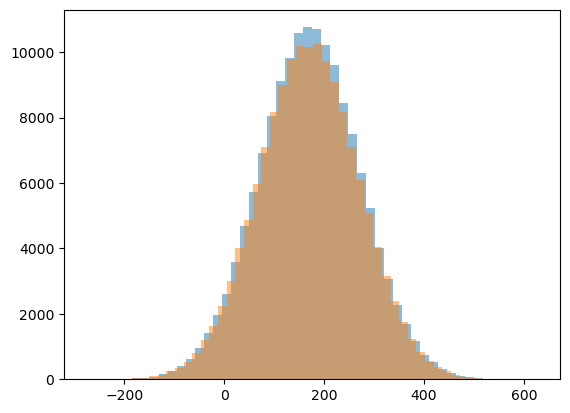

In [4]:
np.random.seed(42) #фиксация случайности

men  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
women = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

results = stats.ttest_ind(men, women, equal_var=False)
alpha = .001
print(f'Гипотеза о равенстве роста мужчин и женщин\nH0 - различий нет\nH1 - различия есть')
print(f'p-значение: {(results.pvalue):.3%}')
if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу - различия есть')
else:
    print('Недостаточно оснований отклонить нулевую гипотезу')
    
plt.hist(men, bins=50, alpha=.5);
plt.hist(women, bins=50, alpha=.5);

<div class="alert alert-info">
<b>Case № 3</b>

Определить объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [5]:
variance = 150 ** 2
confidence = .95
z = 1.96
delta = 50
n = int(((z * variance **.5) / delta) ** 2)
n

34

<div class="alert alert-info">
<b>Case № 4</b>

Необходимо разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Понаблюдав за ответами "волшебника" в течении какого-то периода времени получаем некие результаты.

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [6]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [7]:
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

oddsratio, pvalue = stats.fisher_exact(observations)

oddsratio, pvalue
alpha = .001
print(f'Гипотеза о способностях волшебника\nH0 - говорит наугад\nH1 - предсказывает')
print(f'p-значение: {(pvalue):.3%}')
if pvalue < alpha:
    print('Отклоняем нулевую гипотезу - предсказывает')
else:
    print('Недостаточно оснований отклонить нулевую гипотезу - похоже он говорит наугад')

Гипотеза о способностях волшебника
H0 - говорит наугад
H1 - предсказывает
p-значение: 35.418%
Недостаточно оснований отклонить нулевую гипотезу - похоже он говорит наугад


<div class="alert alert-info">
<b>Case № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), построить доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [8]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h

In [9]:
mean_confidence_interval(data, confidence=0.9)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

<div class="alert alert-info">
<b>Case № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству?

</div>

Гипотеза о том, что выборки A и B принадлежат одному множеству
H0 - различий нет
H1 - различия есть
p-значение: 0.000%
Отклоняем нулевую гипотезу - различия есть


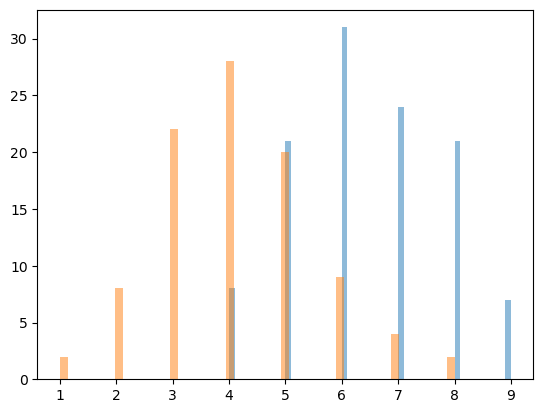

In [10]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]
 
results = stats.ttest_ind(A, B, equal_var=False)
alpha = .05
print(f'Гипотеза о том, что выборки A и B принадлежат одному множеству\nH0 - различий нет\nH1 - различия есть')
print(f'p-значение: {(results.pvalue):.3%}')
if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу - различия есть')
else:
    print('Недостаточно оснований отклонить нулевую гипотезу')
    
plt.hist(A, bins=50, alpha=.5);
plt.hist(B, bins=50, alpha=.5);

<div class="alert alert-info">
<b>Case № 7</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

Гипотеза о равенстве воздействия препаратов
H0 - различий нет
H1 - различия есть
p-значение: 4.274%
Отклоняем нулевую гипотезу - различия есть


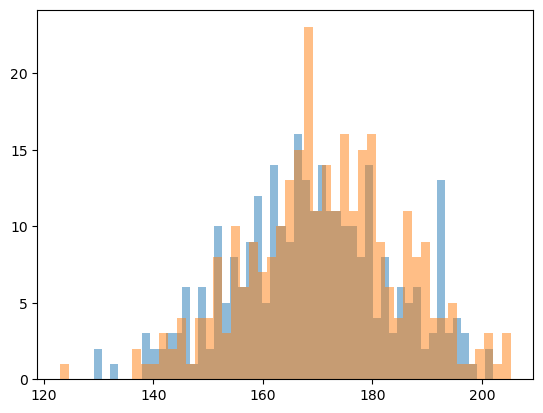

In [11]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

results = stats.ttest_rel(a=A, b=B)
alpha = .05
print(f'Гипотеза о равенстве воздействия препаратов\nH0 - различий нет\nH1 - различия есть')
print(f'p-значение: {(results.pvalue):.3%}')
if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу - различия есть')
else:
    print('Недостаточно оснований отклонить нулевую гипотезу')
    
plt.hist(A, bins=50, alpha=.5);
plt.hist(B, bins=50, alpha=.5);

Устанавливая уровень значимости в 5% теряем в чувствительности и находим отличия где их нет. Чтобы уменьшить вероятность ошибки 1 рода и детектить менее очевидные различия стоит установить альфу в 1%

Гипотеза о равенстве воздействия препаратов
H0 - различий нет
H1 - различия есть
p-значение: 4.274%
Недостаточно оснований отклонить нулевую гипотезу


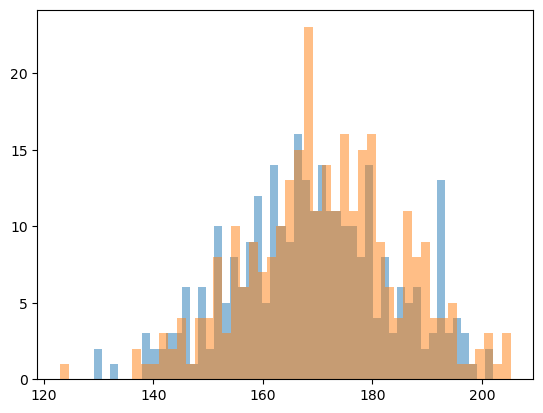

In [12]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

results = stats.ttest_rel(a=A, b=B)
alpha = .001
print(f'Гипотеза о равенстве воздействия препаратов\nH0 - различий нет\nH1 - различия есть')
print(f'p-значение: {(results.pvalue):.3%}')
if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу - различия есть')
else:
    print('Недостаточно оснований отклонить нулевую гипотезу')
    
plt.hist(A, bins=50, alpha=.5);
plt.hist(B, bins=50, alpha=.5);

В этом случае мы даем себе оценку что имеющиеся отличия получены случайно.